In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
os.chdir(r"C:\Users\dbda-lab\Desktop\Dataset\Batch 2\Part A")

In [9]:
# Accessing the  data 
alpha_08 = pd.read_csv('all_alpha_08.csv')
alpha_18 = pd.read_csv('all_alpha_18.csv')

In [16]:
alpha_08_df = pd.DataFrame(alpha_08)
alpha_08_df.head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [19]:
alpha_18_df = pd.DataFrame(alpha_18)
alpha_18_df.head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [20]:
# view missing value count for each feature in 2008
alpha_08_df.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [21]:
# view missing value count for each feature in 2018
alpha_18_df.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [22]:
# As the number of missing data is less than 7%, and each car is different, so filling missing value can be inaccurate
# in this case we can drop rows with any null values in both datasets
alpha_08_df.dropna(inplace=True)
alpha_18_df.dropna(inplace=True)

In [26]:
# print number of duplicates in 2008 and 2018 datasets
sum(alpha_08_df.duplicated()), sum(alpha_18_df.duplicated())

(6, 0)

In [28]:
# drop duplicates in both datasets
alpha_08_df.drop_duplicates(inplace=True)
alpha_18_df.drop_duplicates(inplace=True)

In [29]:
# print number of duplicates again to confirm dedupe - should both be 0
alpha_08_df.duplicated().sum(), alpha_18_df.duplicated().sum()

(0, 0)

<AxesSubplot:>

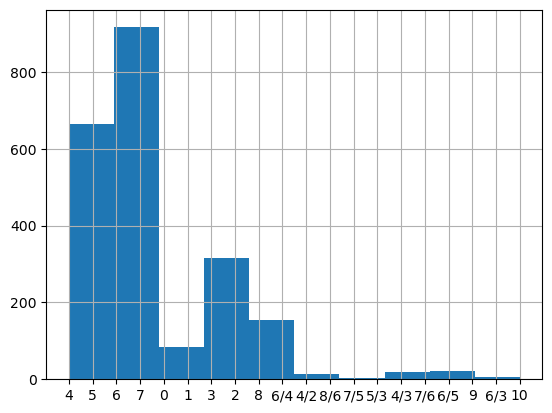

In [34]:
alpha_08_df['Greenhouse Gas Score'].hist()

<AxesSubplot:>

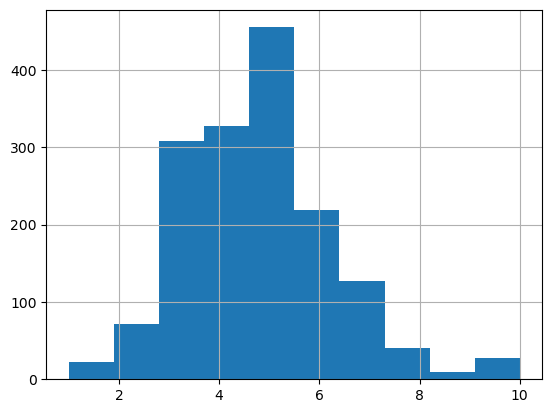

In [35]:
alpha_18_df['Greenhouse Gas Score'].hist()

### Fixing Datatype

In [36]:
# check datatype in 2008 dataset
alpha_08_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2199 non-null   object 
 1   Displ                 2199 non-null   float64
 2   Cyl                   2199 non-null   object 
 3   Trans                 2199 non-null   object 
 4   Drive                 2199 non-null   object 
 5   Fuel                  2199 non-null   object 
 6   Sales Area            2199 non-null   object 
 7   Stnd                  2199 non-null   object 
 8   Underhood ID          2199 non-null   object 
 9   Veh Class             2199 non-null   object 
 10  Air Pollution Score   2199 non-null   object 
 11  FE Calc Appr          2199 non-null   object 
 12  City MPG              2199 non-null   object 
 13  Hwy MPG               2199 non-null   object 
 14  Cmb MPG               2199 non-null   object 
 15  Unadj Cmb MPG        

In [37]:
alpha_18_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1609 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1609 non-null   object 
 4   Drive                 1609 non-null   object 
 5   Fuel                  1609 non-null   object 
 6   Cert Region           1609 non-null   object 
 7   Stnd                  1609 non-null   object 
 8   Stnd Description      1609 non-null   object 
 9   Underhood ID          1609 non-null   object 
 10  Veh Class             1609 non-null   object 
 11  Air Pollution Score   1609 non-null   int64  
 12  City MPG              1609 non-null   object 
 13  Hwy MPG               1609 non-null   object 
 14  Cmb MPG               1609 non-null   object 
 15  Greenhouse Gas Score 

In [38]:
# drop columns from 2008 dataset
alpha_08_df.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1, inplace=True)

# drop columns from 2018 dataset
alpha_18_df.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1, inplace=True)

In [42]:
alpha_18_df.columns,alpha_08_df.columns

(Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
        'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
        'Greenhouse Gas Score', 'SmartWay'],
       dtype='object'),
 Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
        'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
        'Greenhouse Gas Score', 'SmartWay'],
       dtype='object'))

In [46]:
# Checking unique value in cert region for 2018 data
alpha_18_df['Cert Region'].value_counts()

FA    812
CA    797
Name: Cert Region, dtype: int64

In [51]:
# Converting float to ints in the 2018 cyl column.
alpha_18_df['Cyl']=alpha_18_df['Cyl'].astype(int)

In [53]:
alpha_08_df['Air Pollution Score'].sample(5)

1043    7
134     7
640     6
521     6
276     6
Name: Air Pollution Score, dtype: object

In [55]:
# Find out the row(s) that contain '6/4
alpha_08_df[alpha_08_df['Air Pollution Score'] == '6/4']

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1550,MERCEDES-BENZ C300,3.0,(6 cyl),Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [56]:
# First, let's get all the hybrids in 2008
alpha_08_df = alpha_08_df[alpha_08_df['Fuel'].str.contains('/')]
alpha_08_df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no


In [58]:
# hybrids in 2018
alpha_08_df = alpha_08_df[alpha_08_df['Fuel'].str.contains('/')]
alpha_08_df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no


In [59]:
# creating two copies of the 2008 hybrids dataframe
df1 = alpha_08_df.copy()  # data on first fuel type of each hybrid vehicle
df2 = alpha_08_df.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,(8 cyl),Auto-L5,4WD,ethanol/gas,FA,pickup,3/3,9/14,12/19,10/15,4/3,no
1764,NISSAN Armada,5.6,(8 cyl),Auto-L5,2WD,ethanol/gas,FA,SUV,6/6,9/12,13/18,10/14,4/2,no
1765,NISSAN Armada,5.6,(8 cyl),Auto-L5,4WD,ethanol/gas,FA,SUV,6/6,9/12,13/17,10/14,4/2,no
1808,NISSAN Titan,5.6,(8 cyl),Auto-L5,2WD,ethanol/gas,FA,pickup,6/6,9/12,13/17,10/14,4/2,no


In [60]:
# columns to split by "/"
split_columns = ['Fuel', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [61]:
# this dataframe holds info for the FIRST fuel type of the hybrid, aka the values before the "/"s
df1
# this dataframe holds info for the SECOND fuel type of the hybrid, aka the values after the "/"s
df2

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,gas,FC,SUV,7,14,20,16,4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,gas,FC,SUV,7,14,19,16,4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,gas,FC,SUV,6,14,20,16,4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,gas,FC,SUV,6,14,19,16,4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,gas,FC,van,6,12,16,14,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,(8 cyl),Auto-L5,4WD,gas,FA,pickup,3,14,19,15,3,no
1764,NISSAN Armada,5.6,(8 cyl),Auto-L5,2WD,gas,FA,SUV,6,12,18,14,2,no
1765,NISSAN Armada,5.6,(8 cyl),Auto-L5,4WD,gas,FA,SUV,6,12,17,14,2,no
1808,NISSAN Titan,5.6,(8 cyl),Auto-L5,2WD,gas,FA,pickup,6,12,17,14,2,no


In [62]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_14052\553349515.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol,FC,SUV,6,11,14,12,6,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol,FC,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,(8 cyl),Auto-L5,4WD,gas,FA,pickup,3,14,19,15,3,no
1764,NISSAN Armada,5.6,(8 cyl),Auto-L5,2WD,gas,FA,SUV,6,12,18,14,2,no
1765,NISSAN Armada,5.6,(8 cyl),Auto-L5,4WD,gas,FA,SUV,6,12,17,14,2,no
1808,NISSAN Titan,5.6,(8 cyl),Auto-L5,2WD,gas,FA,pickup,6,12,17,14,2,no


# EDA

In [64]:
# import library for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Load cleaned data
df_08=pd.read_csv('clean_08.csv')
df_18=pd.read_csv('clean_18.csv')
# view the data
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


###  1. Alternative Fuel Sources

In [67]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [68]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [70]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [71]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

In [72]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [73]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

Text(0, 0.5, 'Proportion of Unique Models')

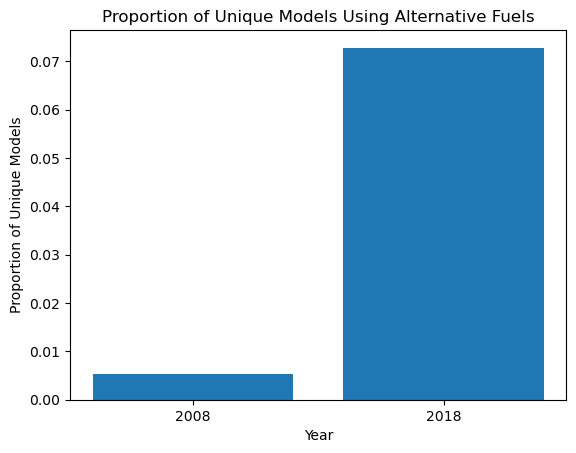

In [74]:
# visualize the proportion of Unique Models in using alternative sources of fuel in 2008 and 2018
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models")

### 4. is there any change in characteristics of smart way vehicle

In [80]:
# subset the dataframe with only the model using alternative fuel, CNG and ethanol for 2008
df_alt_08=df_08.query('fuel in ["CNG", "ethanol"]')
df_alt_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
388,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,small car,9.5,24.0,36.0,28.0,9,yes
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


In [81]:
# subset the dataframe with only the model using alternative fuel, Ethanol and Electricity for 2018
df_alt_18=df_18.query('fuel in ["Ethanol", "Electricity"]')
print(df_alt_18.shape)
df_alt_18.head(1)

(38, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
760,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5.0,14.0,20.0,16.0,4,No


In [82]:
df_alt_08.mean()

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_14052\3857615316.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_alt_08.mean()


displ                    2.40
cyl                      5.00
air_pollution_score      7.75
city_mpg                18.50
hwy_mpg                 27.50
cmb_mpg                 21.50
greenhouse_gas_score     8.00
dtype: float64

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_14052\3657631019.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.bar(x=df_alt_08.mean().index, height=df_alt_08.mean(),width=0.5)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

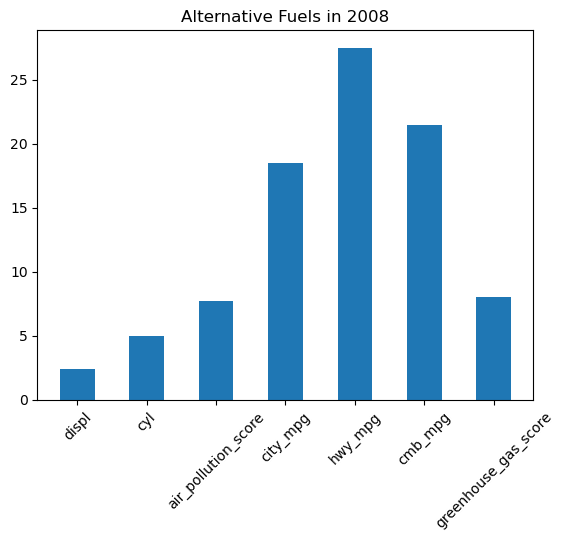

In [83]:
# plotting the mean value for 2008 alternative fuel
plt.bar(x=df_alt_08.mean().index, height=df_alt_08.mean(),width=0.5)
plt.title("Alternative Fuels in 2008")
plt.xticks(rotation =45)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_14052\473543306.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.bar(x=df_alt_18.mean().index, height=df_alt_18.mean(),width=0.5)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

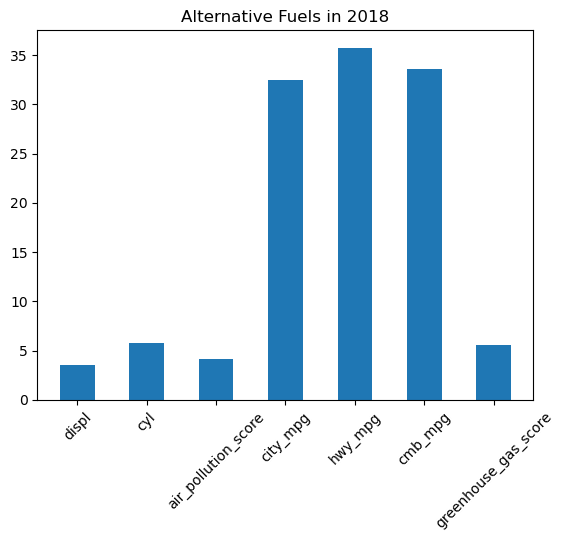

In [84]:
# plotting the mean value for 2018 alternative fuel
plt.bar(x=df_alt_18.mean().index, height=df_alt_18.mean(),width=0.5)
plt.title("Alternative Fuels in 2018")
plt.xticks(rotation =45)

In [66]:
# smartway labels for 2008
df_08.smartway.value_counts()
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')
# explore smartway vehicles in 2008
smart_08.describe()
# smartway labels for 2018
df_18.smartway.value_counts()
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In 2018, there are Elite as a new type of SmartWay drive, and compared with 2008, city_mpg, hwy_mpg, cmb_mpg and greenhouse_gas_score all increased in 2018, while air_pollution_score decreased, and vehicles with SmartWay in 2018 have smaller size of engine and smaller number of cyliners, we can conclude that SmartWay helps fuel efficiency and the technology has improved over time

### Features correlation

In [93]:
df_08.corr()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.899304,-0.289993,-0.790440,-0.801678,-0.818799,-0.847613
cyl,0.899304,1.000000,-0.270417,-0.756304,-0.733064,-0.770538,-0.820940
air_pollution_score,-0.289993,-0.270417,1.000000,0.432434,0.400708,0.425784,0.388444
city_mpg,-0.790440,-0.756304,0.432434,1.000000,0.902942,0.980891,0.910693
hwy_mpg,-0.801678,-0.733064,0.400708,0.902942,1.000000,0.960533,0.931744
cmb_mpg,-0.818799,-0.770538,0.425784,0.980891,0.960533,1.000000,0.947607
greenhouse_gas_score,-0.847613,-0.820940,0.388444,0.910693,0.931744,0.947607,1.000000


In [79]:
df_18.corr()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.928189,-0.384986,-0.536748,-0.605202,-0.574880,-0.754193
cyl,0.928189,1.000000,-0.404966,-0.524090,-0.589986,-0.561166,-0.743946
air_pollution_score,-0.384986,-0.404966,1.000000,0.288700,0.309338,0.301150,0.390771
city_mpg,-0.536748,-0.524090,0.288700,1.000000,0.950309,0.992635,0.785513
hwy_mpg,-0.605202,-0.589986,0.309338,0.950309,1.000000,0.978206,0.826981
cmb_mpg,-0.574880,-0.561166,0.301150,0.992635,0.978206,1.000000,0.814982
greenhouse_gas_score,-0.754193,-0.743946,0.390771,0.785513,0.826981,0.814982,1.000000


### Improvement in fuel economy

In [85]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [86]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

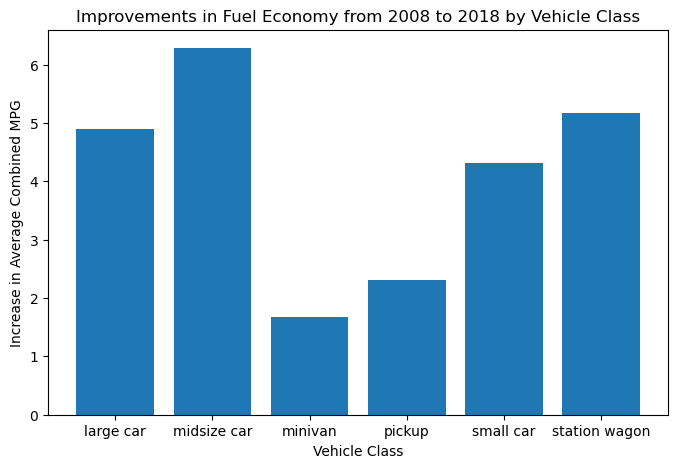

In [89]:
# only plot the classes that exist in both years
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');